In [1]:
import os
import glob
import pandas as pd
from datetime import datetime
os.chdir('C:/Users/ww/Documents/Data/self-study/relativesearch202100401-0430/')

I am saving the past month name which will appear in the plot.

In [2]:
from datetime import date, timedelta

first_day_of_current_month = date.today().replace(day=1)
last_day_of_previous_month = first_day_of_current_month - timedelta(days=1)

print("Past month:", last_day_of_previous_month.strftime('%B'), last_day_of_previous_month.year)

Past month: April 2021


Let's extract dataset filenames (which are also keywords) from the directory folder.

In [3]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [4]:
all_filenames

['relative search - blockchain.csv',
 'relative search - fintech.csv',
 'relative search - insurtech.csv',
 'relative search - lending.csv',
 'relative search - mobile payments.csv',
 'relative search - open banking.csv',
 'relative search - personal finance.csv',
 'relative search - regtech.csv',
 'relative search - remittance.csv',
 'relative search - trade finance.csv',
 'relative search - virtual banking.csv']

Importing datasets and merging the tables by column 'Country'

In [5]:
data = None
filelist = all_filenames
for f in filelist:
    if data is None:
        data = pd.read_csv(f, index_col='Country')
    else:
        data = data.join(pd.read_csv(f, index_col='Country'))

Some datasets have Dtype 'object' (i.e. have characters instead of numbers), cause while extracting them I wanted to include the smallest values, it didn't change anything except that it gave a few countries a value of "<1" in those datasets.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, Togo to Samoa
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   blockchain        80 non-null     object 
 1   fintech           67 non-null     float64
 2   insurtech         22 non-null     float64
 3   lending           41 non-null     object 
 4   mobile payments   13 non-null     float64
 5   open banking      10 non-null     float64
 6   personal finance  7 non-null      float64
 7   regtech           15 non-null     float64
 8   remittance        54 non-null     object 
 9   trade finance     40 non-null     float64
 10  virtual banking   7 non-null      float64
dtypes: float64(8), object(3)
memory usage: 31.5+ KB


That's why I am replacing "<1" by 0.

In [7]:
data = data.replace('<1',0)

Changing all the data from type object to type float64 for analysis.

In [8]:
column_names = data.columns.tolist()

In [9]:
column_names

['blockchain',
 'fintech',
 'insurtech',
 'lending',
 'mobile payments',
 'open banking',
 'personal finance',
 'regtech',
 'remittance',
 'trade finance',
 'virtual banking']

In [10]:
data[column_names] = data[column_names].astype('float64')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, Togo to Samoa
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   blockchain        80 non-null     float64
 1   fintech           67 non-null     float64
 2   insurtech         22 non-null     float64
 3   lending           41 non-null     float64
 4   mobile payments   13 non-null     float64
 5   open banking      10 non-null     float64
 6   personal finance  7 non-null      float64
 7   regtech           15 non-null     float64
 8   remittance        54 non-null     float64
 9   trade finance     40 non-null     float64
 10  virtual banking   7 non-null      float64
dtypes: float64(11)
memory usage: 31.5+ KB


Now when Python considers all columns as floating point numbers (Dtype float64), I can sum up the values from all columns in one column 'Total' which will be the final score to visualize.

In [12]:
data['Total'] = data.sum(axis=1)

Sorting the values in descending order.

In [13]:
data = data.sort_values('Total', ascending=False)

Saving the resulting dataset to a separate file

In [14]:
data.to_csv("result_dataset/world_data.csv")

Displaying first 10 countries from the table

In [15]:
data.head(10)

,blockchain,fintech,insurtech,lending,mobile payments,open banking,personal finance,regtech,remittance,trade finance,virtual banking,Total
Country,,,,,,,,,,,,
Hong Kong,12.0,56.0,100.0,62.0,NaN,NaN,NaN,100.0,16.0,19.0,NaN,365.0
United Kingdom,14.0,16.0,45.0,32.0,46.0,43.0,100.0,2.0,4.0,11.0,1.0,314.0
Singapore,19.0,86.0,48.0,48.0,NaN,NaN,NaN,28.0,32.0,44.0,NaN,305.0
United States,7.0,9.0,14.0,81.0,43.0,5.0,90.0,1.0,2.0,6.0,2.0,260.0
Philippines,4.0,5.0,NaN,100.0,19.0,33.0,48.0,NaN,28.0,9.0,4.0,250.0
Nigeria,44.0,43.0,NaN,27.0,NaN,100.0,NaN,NaN,8.0,9.0,NaN,231.0
Zimbabwe,15.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,215.0
Australia,7.0,8.0,NaN,39.0,28.0,12.0,98.0,3.0,6.0,6.0,NaN,207.0
Canada,11.0,12.0,6.0,27.0,26.0,7.0,85.0,NaN,12.0,5.0,NaN,191.0


## Data Visualization

In case of the world map, small countries like Singapore and Hong Kong, will get lost among others but they're important to showcase, so I switched to barplot after seeing the result.

### World Map

In [16]:
#pip install git+git://github.com/geopandas/geopandas.git
#pip install descartes
#!pip install mapclassify

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [18]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

In [19]:
world = pd.merge(world,data,left_on='name',right_on='Country')

In [20]:
gpd.__version__

'0.9.0+22.g85e066a'

In [21]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,blockchain,fintech,insurtech,lending,mobile payments,open banking,personal finance,regtech,remittance,trade finance,virtual banking,Total
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,38.0
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",11.0,12.0,6.0,27.0,26.0,7.0,85.0,NaN,12.0,5.0,NaN,191.0
3,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,39570125,Africa,Uganda,UGA,84930.0,"POLYGON ((33.90371 -0.95000, 31.86617 -1.02736...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,59.0
153,11901484,Africa,Rwanda,RWA,21970.0,"POLYGON ((30.41910 -1.13466, 30.81613 -1.69891...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
154,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
155,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


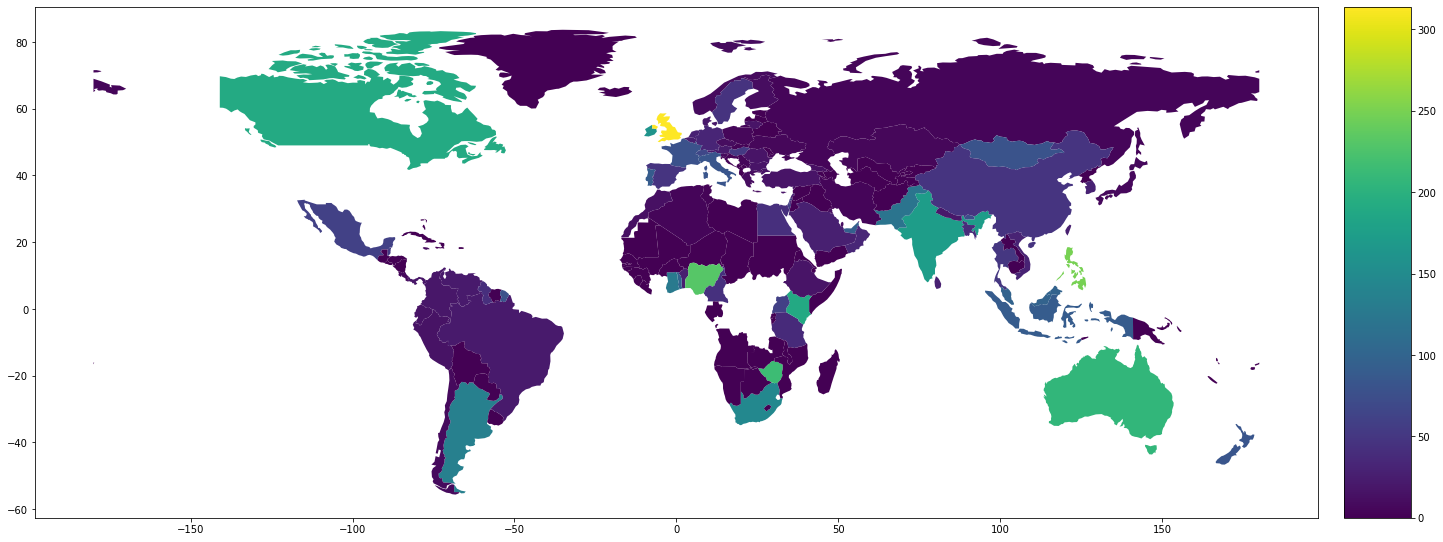

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(25,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world.plot(column='Total', ax=ax, legend=True, cax=cax, missing_kwds={ "color": "lightgrey" })

plt.show()

### Barplot

I chose to select top 50 countries for the barplot.

In [23]:
countries_to_visualize = 50

In [24]:
print(len(data) - len(data[data['Total']==0]), "countries have a score more than 0")

99 countries have a score more than 0


In [25]:
print((len(data) - len(data[data['Total']==0])) - countries_to_visualize, "countries will not be visualized")

49 countries will not be visualized


In [26]:
#Part 2
import os
import glob
import pandas as pd
os.chdir('C:/Users/ww/Documents/Data/self-study/relativesearch202100401-0430/')

In [27]:
world_data = pd.read_csv("result_dataset/world_data.csv").head(countries_to_visualize)

In [28]:
world_data = world_data[world_data['Total'] > 0] 

In [29]:
#conda install -c plotly plotly-orca

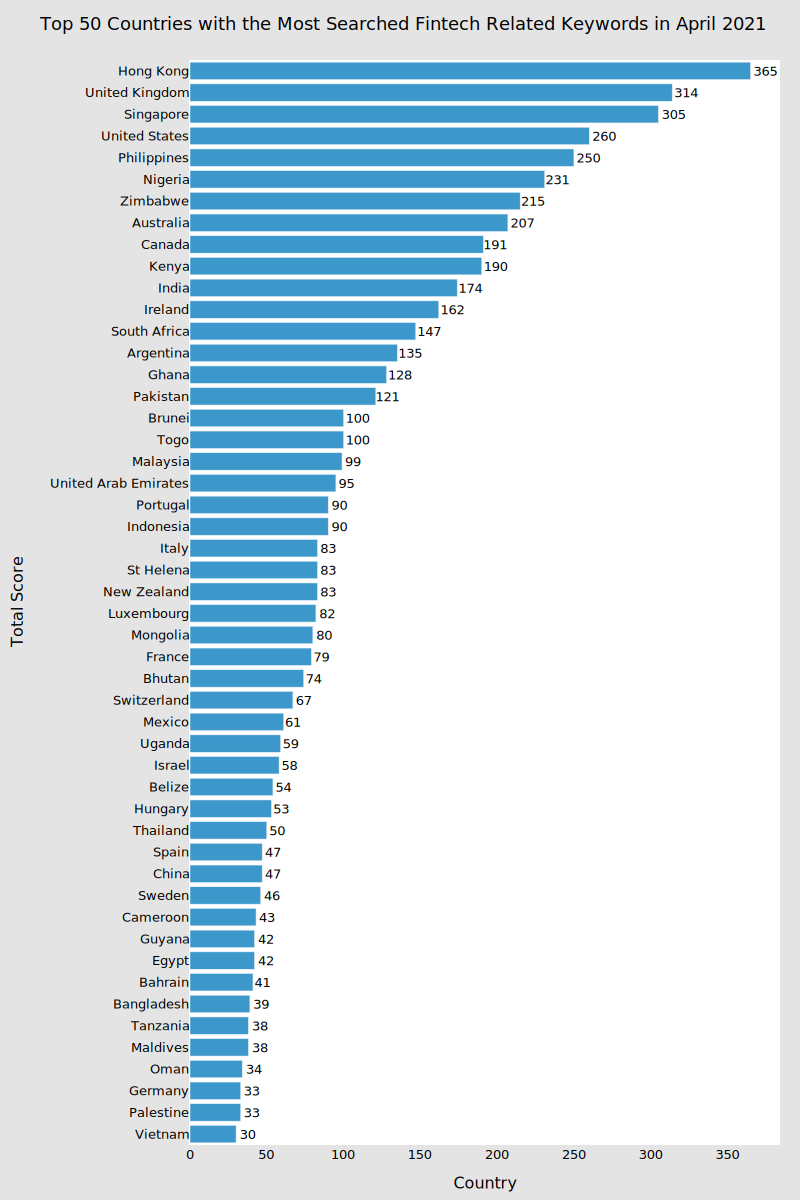

In [35]:
import plotly.graph_objects as go

x = world_data['Total']
y = world_data['Country']


fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=x,
            textposition='outside',
            #color_continuous_scale='Blues',
            marker_color="#3C98CA", #color relevant to FNN
            orientation='h',
        )],)
fig.update_layout(margin=dict(l=190, r=20, t=60, b=15), 
                  plot_bgcolor="white",
                  paper_bgcolor="#E4E4E4",
                  yaxis={'categoryorder':'total ascending'},
                  barmode='group', height=1200,
                  #title="Top 50 Countries with the Most Searched Fintech Keywords in April 2021",
                  title_text="Top {} Countries with the Most Searched Fintech Related Keywords in {} {}".format(countries_to_visualize, last_day_of_previous_month.strftime('%B'), last_day_of_previous_month.year),
                  xaxis_title="Country",
                  yaxis_title="Total Score",
                  font=dict(family="Montserrat", size=13, color="black") #title font from FNN site
)


fig.show(renderer="svg", height=1200, width=800)